In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = catalog.load('train')

2020-10-05 18:15:12,132 - kedro.io.data_catalog - INFO - Loading data from `train` (CSVDataSet)...


In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


c:\users\sarve\anaconda3\envs\kedro-environment\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
df.duplicated().sum()

0

In [25]:
df['Credit_History'].value_counts()

c:\users\sarve\anaconda3\envs\kedro-environment\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [26]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [27]:
df.shape

(614, 13)

In [33]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].str.rstrip('+')

In [52]:
df.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

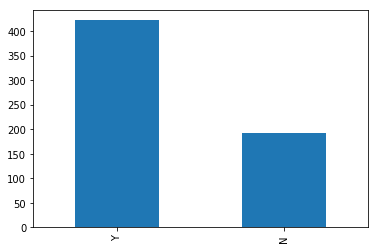

In [60]:
df['Loan_Status'].value_counts().plot(kind='bar')

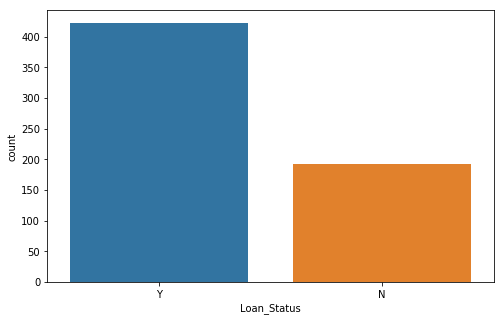

In [67]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Loan_Status')

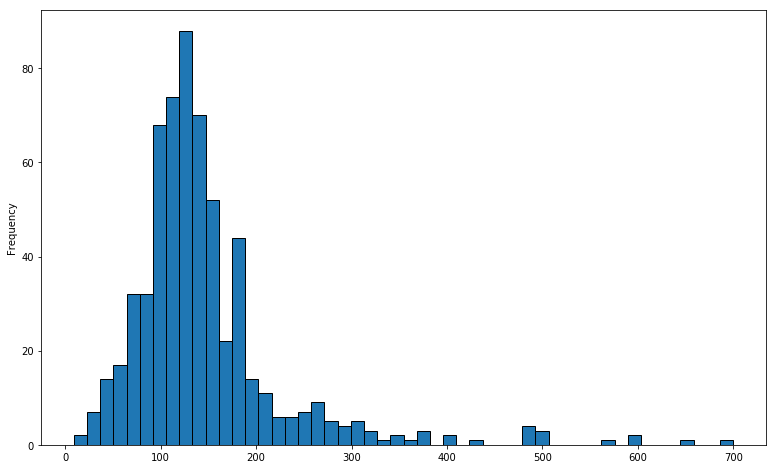

In [78]:
df['LoanAmount'].plot(kind='hist',figsize=(13,8),bins=50,edgecolor='k')

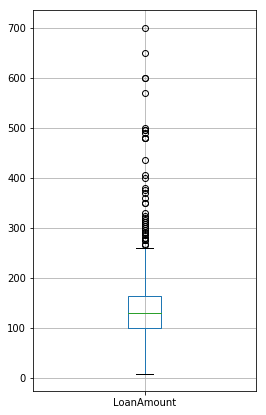

In [79]:
df.boxplot(column='LoanAmount',figsize=(4,7))

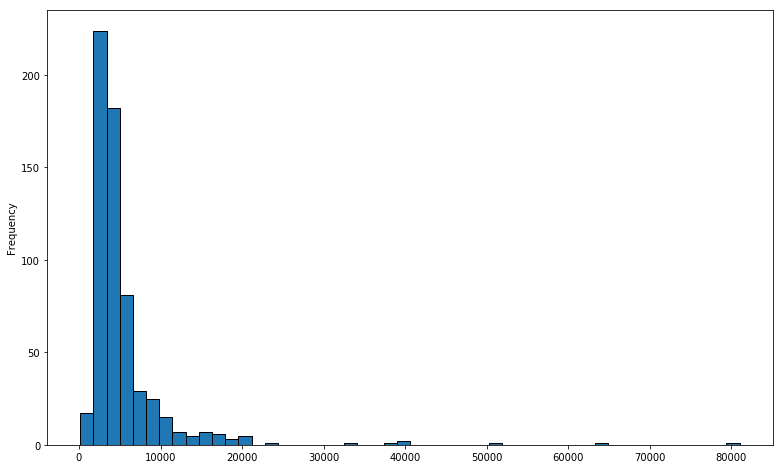

In [81]:
df['ApplicantIncome'].plot(kind='hist',figsize=(13,8),bins=50,edgecolor='k')

In [89]:
df['ApplicantIncome'].median()

3812.5

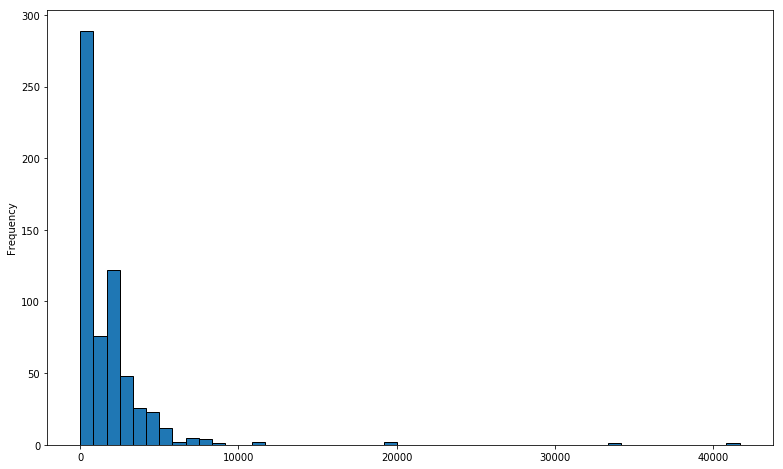

In [87]:
df['CoapplicantIncome'].plot(kind='hist',figsize=(13,8),bins=50,edgecolor='k')

In [91]:
df['CoapplicantIncome'].median()

c:\users\sarve\anaconda3\envs\kedro-environment\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1188.5

In [101]:
df.groupby(['Property_Area','Loan_Status'])['Loan_Status'].count()

Property_Area  Loan_Status
Rural          N               69
               Y              110
Semiurban      N               54
               Y              179
Urban          N               69
               Y              133
Name: Loan_Status, dtype: int64

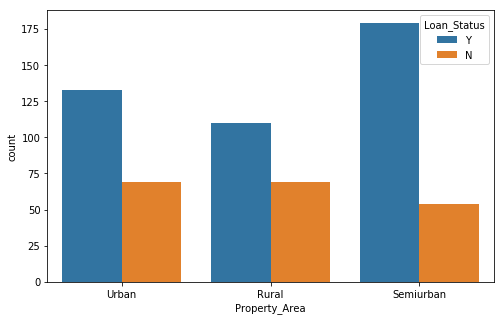

In [100]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Property_Area',hue='Loan_Status')

In [102]:
df.groupby(['Property_Area','Education'])['Loan_Status'].count()

c:\users\sarve\anaconda3\envs\kedro-environment\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Property_Area  Education   
Rural          Graduate        131
               Not Graduate     48
Semiurban      Graduate        187
               Not Graduate     46
Urban          Graduate        162
               Not Graduate     40
Name: Loan_Status, dtype: int64

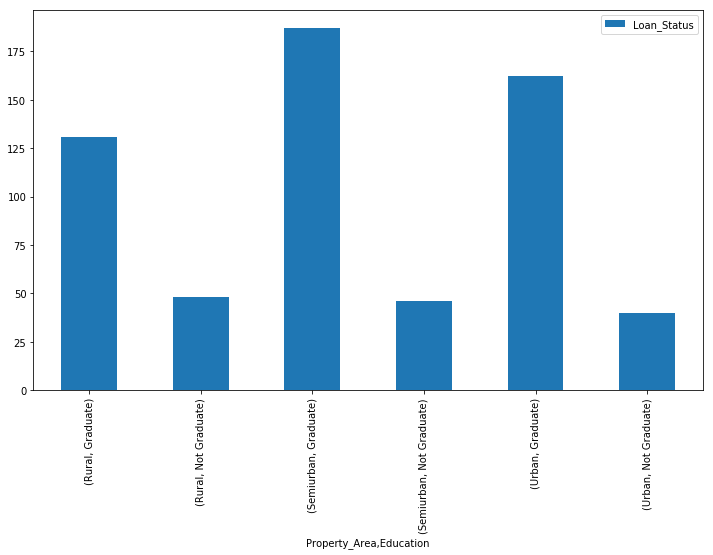

In [103]:
df.groupby(['Property_Area','Education'])['Loan_Status'].count().plot(kind='bar',stacked=True,figsize=(12,7),legend=True)

In [105]:
df.groupby(['Gender','Credit_History','Loan_Status'])['Loan_Status'].count()

Gender  Credit_History  Loan_Status
Female  0.0             N               16
                        Y                1
        1.0             N               21
                        Y               74
Male    0.0             N               66
                        Y                6
        1.0             N               89
                        Y              341
Name: Loan_Status, dtype: int64

c:\users\sarve\anaconda3\envs\kedro-environment\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


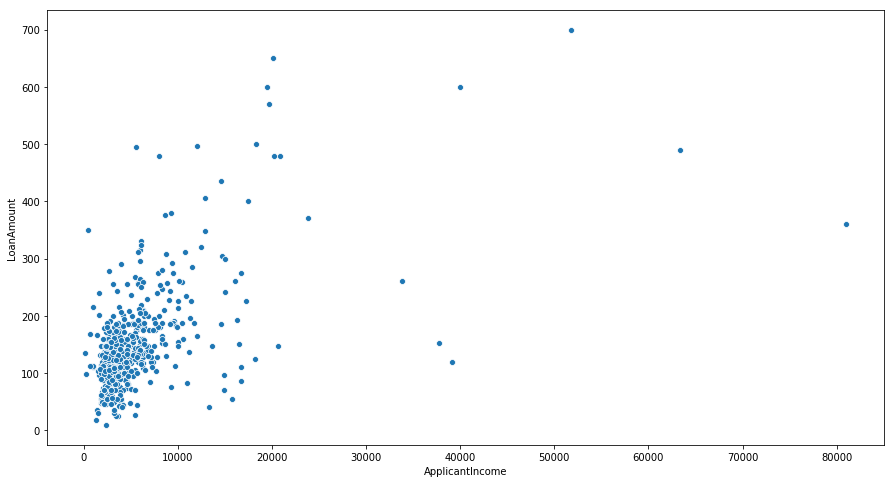

In [108]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='ApplicantIncome',y='LoanAmount')

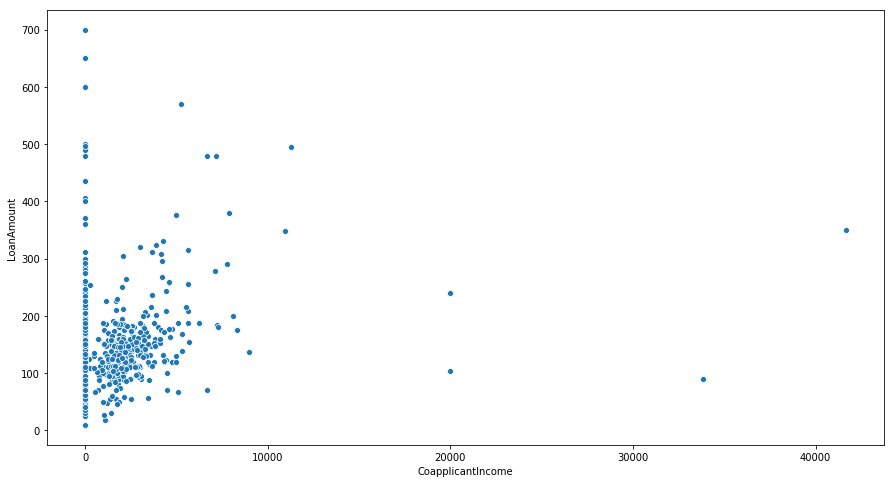

In [110]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='CoapplicantIncome',y='LoanAmount')

c:\users\sarve\anaconda3\envs\kedro-environment\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


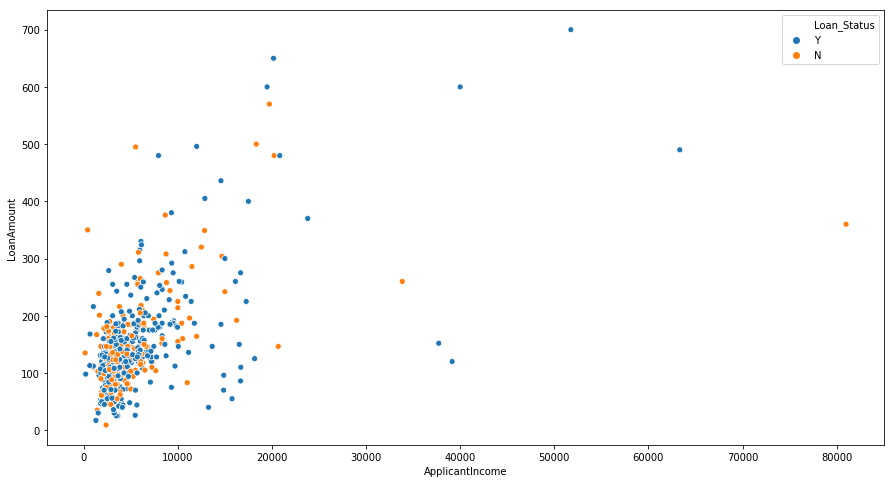

In [113]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='ApplicantIncome',y='LoanAmount',hue='Loan_Status')

In [115]:
cleandf = catalog.load('cleantrain')

DataSetNotFoundError: DataSet 'cleantrain' not found in the catalog - did you mean one of these instead: train